In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_notarget = pickle.load(open('results/1608249286.4124625_full_no_target.pickle', 'rb'))
data_target = pickle.load(open('results/1608235683.7145748_full_with_target.pickle', 'rb'))

print(data_target['config'])
print('----')
print(data_notarget['config'])

{'envName': 'CartPole-v1', 'useTargetQ': True, 'QTargetLag': 100, 'adpBins': 9, 'mutual': {'ADPQ': True, 'heterogeneous': True, 'mutualSteps': 1000}, 'standard': {'Q': True, 'ADP': True}, 'trials': 50, 'stepsPerTrial': 10000, 'stepsPerEvaluation': 100, 'gamma': 0.9, 'holdOutStates': 1000}
----
{'envName': 'CartPole-v1', 'useTargetQ': False, 'QTargetLag': 100, 'adpBins': 9, 'mutual': {'ADPQ': True, 'heterogeneous': True, 'mutualSteps': 1000}, 'standard': {'Q': True, 'ADP': True}, 'trials': 50, 'stepsPerTrial': 10000, 'stepsPerEvaluation': 100, 'gamma': 0.9, 'holdOutStates': 1000}


In [6]:
data_notarget['names']

['adp_sharing_tuples',
 'q_mutual',
 'q_standard',
 'adp_standard',
 'single_agent_mutual']

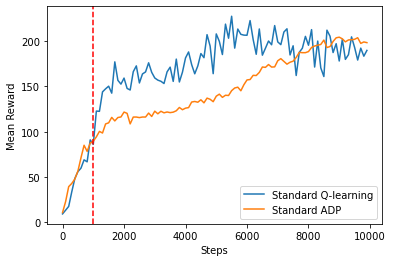

In [16]:
xticks = np.arange(100) * 100
mutual_q_mean = np.mean(data_notarget['results'], axis=0).T[1]
std_q_mean = np.mean(data_notarget['results'], axis=0).T[2]
std_adp_mean = np.mean(data_notarget['results'], axis=0).T[3]
plt.plot(xticks, std_q_mean, label='Standard Q-learning')
#plt.plot(xticks, mutual_q_mean, label='Mutual Q-learning')
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.axvline(1000, color='r', ls='--')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/standards.png')

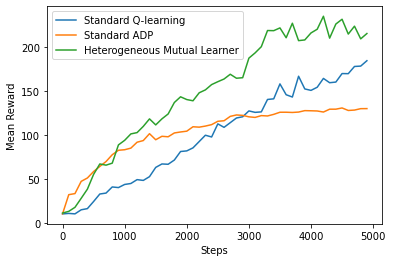

In [29]:
xticks = np.arange(50) * 100

mut_q_mean = np.mean(data_mut['results'], axis=0)[:, 0]
mut_adp_mean = np.mean(data_mut['results'], axis=0)[:, 1]
hetmut_mean = np.mean(data_mut['results'], axis=0)[:, 2]

plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, std_adp_mean, label='Standard ADP')
plt.plot(xticks, hetmut_mean, label='Heterogeneous Mutual Learner')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/het_comparison.png')

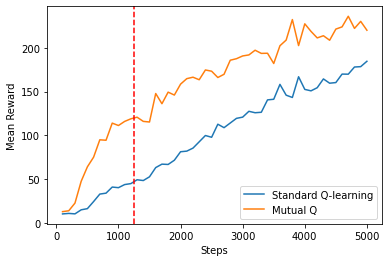

In [28]:
xticks = np.arange(1, 51) * 100

#q_std = np.std(data_std, axis=0).T[2]
#q_mean = np.mean(data_std, axis=0).T[2]
plt.plot(xticks, std_q_mean, label='Standard Q-learning')
plt.plot(xticks, mut_q_mean, label='Mutual Q')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()
plt.axvline(1250, ls='--', c='r')
plt.savefig('./figs/q_mutual_comparison.png')

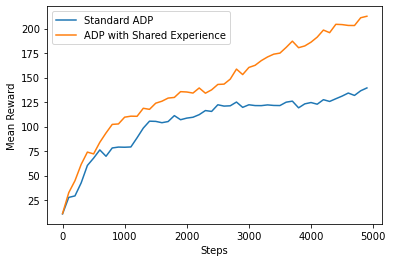

In [19]:
xticks = np.arange(50) * 100

plt.plot(xticks, std_adp_mean, label='Standard ADP')

plt.plot(xticks, mut_adp_mean, label='ADP with Shared Experience')

plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.savefig('./figs/adp_mutual_comparison.png')

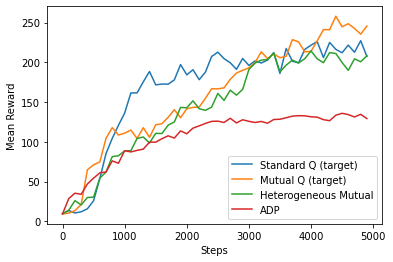

In [20]:
std_target_q_mean = np.mean(data_target['results'], axis=0)[:, 2]
mutual_target_q_mean = np.mean(data_target['results'], axis=0)[:, 1]
hetmut_target_mean = np.mean(data_target['results'], axis=0)[:, 4]
adp_mean = np.mean(data_target['results'], axis=0)[:, 3]

xticks = np.arange(50) * 100

plt.plot(xticks, std_target_q_mean, label='Standard Q (target)')
plt.plot(xticks, mutual_target_q_mean, label='Mutual Q (target)')
plt.plot(xticks, hetmut_target_mean, label='Heterogeneous Mutual')
plt.plot(xticks, adp_mean, label='ADP')


plt.xlabel('Steps')
plt.ylabel('Mean Reward')

plt.legend()

plt.show()
#plt.savefig('./figs/adp_mutual_comparison.png')